In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

import numpy as np
import pandas as pd


In [12]:
two_blobs = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\cluster_two_blobs.csv')

In [13]:
two_blobs_outliers = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

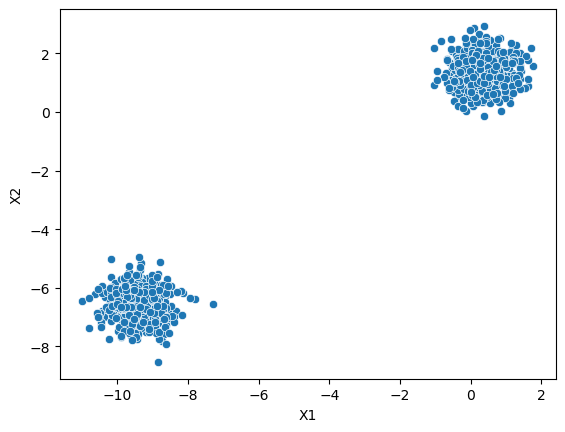

In [14]:
sns.scatterplot(data=two_blobs ,x ='X1',y='X2')

In [15]:
def display(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',palette='Set1',hue=labels)

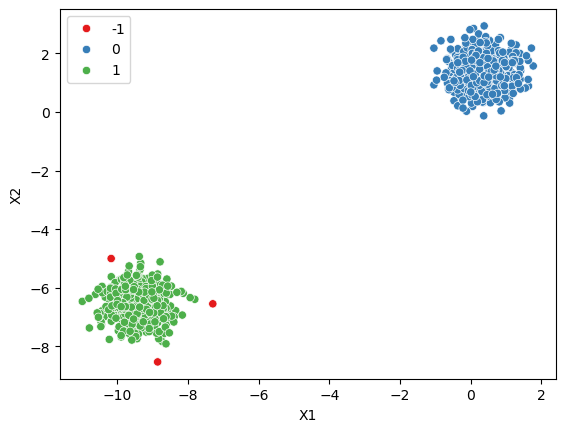

In [16]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
display(model,two_blobs)

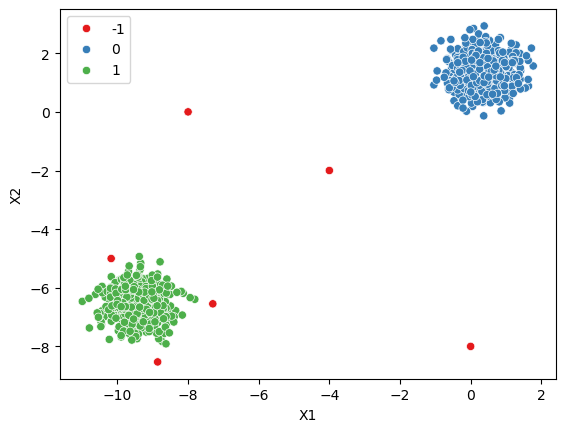

In [17]:
display(model,two_blobs_outliers)

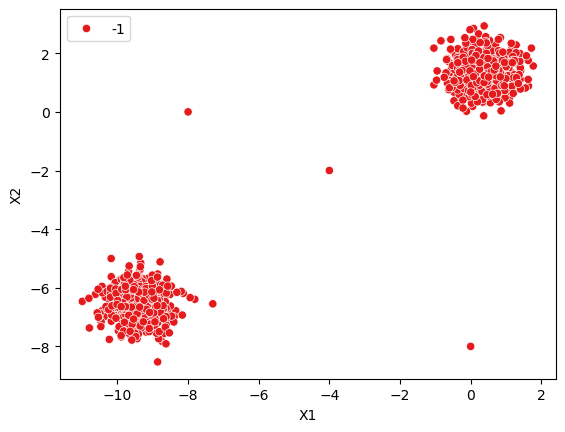

In [18]:
# it's to small so it cluster everything as outliers
model = DBSCAN(eps=0.001)
display(model,two_blobs_outliers)

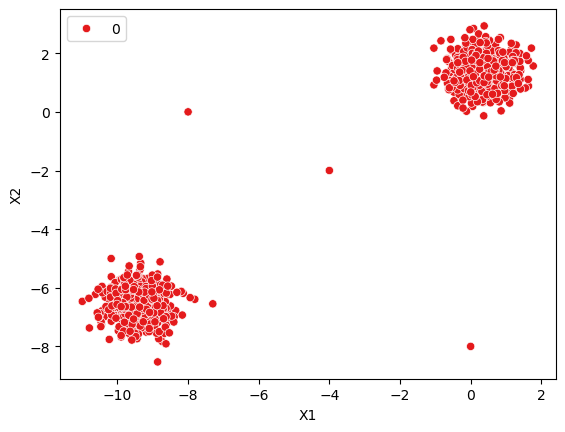

In [19]:

model = DBSCAN(eps=10)
display(model,two_blobs_outliers)

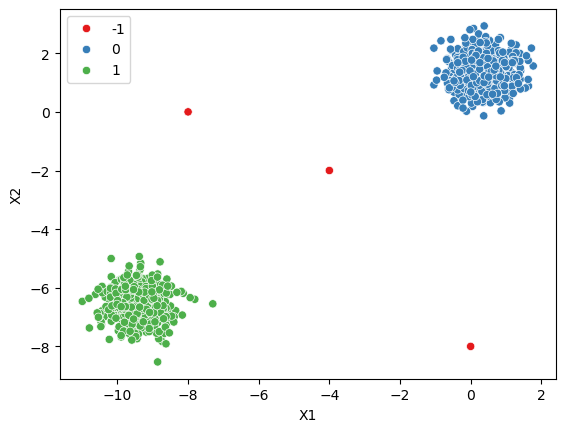

In [20]:
# er reach the sweet zone where it's prefect to our data
model = DBSCAN(eps=1)
display(model,two_blobs_outliers)

In [26]:
noise_count = np.sum(model.labels_ == -1)
noise_count

np.int64(3)

In [30]:
percentage = 100 * noise_count/len(model.labels_)
percentage

np.float64(0.29910269192422734)

In [31]:
pre_outliers = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    model = DBSCAN(eps=eps)
    model.fit_predict(two_blobs_outliers)
    number_of_outliers.append(np.sum(model.labels_ == -1))
    pre_outliers.append(100* np.sum(model.labels_ == -1) /len(model.labels_))


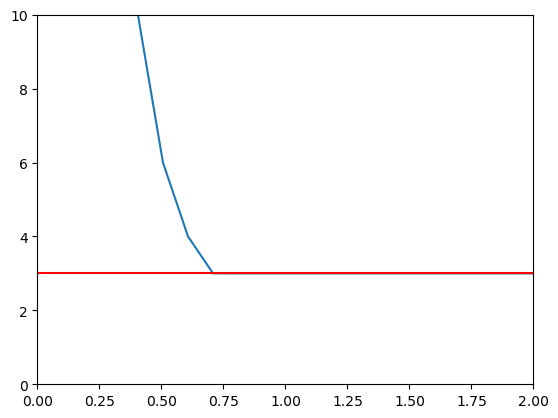

In [ ]:
# our sweet spot here epslion between 0.25, and 0.75
sns.lineplot(x =np.linspace(0.001,10,100),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,colors='red')

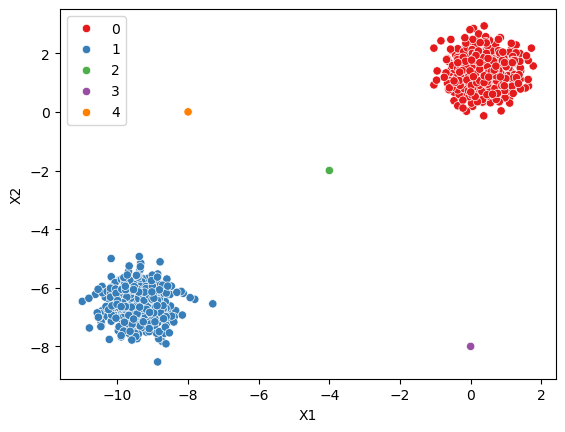

In [47]:
model = DBSCAN(min_samples=1,eps=0.75)
display(model,two_blobs_outliers)